In [ ]:
import numpy as np
import cv2
import math
import os
import shutil
import random

#display results
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('grayscale')
              
%matplotlib inline

## Preparations

[Requirements](https://drive.google.com/open?id=1DoLfSMpU2_sZILJTonsvdk7ku7Jf6BdJCvfAZJJ96nY)

## References

[cs231n](http://cs231n.stanford.edu/syllabus.html) : Lesson 1-2

[Udacity. Computational Photography](https://www.udacity.com/course/computational-photography--ud955)

[Udacity. Introduction to Computer Vision](https://www.udacity.com/course/introduction-to-computer-vision--ud810)

[PyImageSearch](https://www.pyimagesearch.com/)

[LearnOpenCV](https://www.learnopencv.com/)

## Why Image Processing Important? 
[Source](https://electrek.co/2018/06/11/tesla-ai-director-insights-autopilot-computer-vision-neural-net/)

![1](images/amount_of_sleep.jpg)

### Importance of Dataset

![image](images/dataset-size-accuracy.jpg)

### Classic CV vs Deep Learning CV

- Classic CV : less data, more expertise
- Deep Learning CV: more data, less expertise

**Do both**

### Some common functions

In [ ]:
# Make plots bigger
scale = 2
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] *= scale
fig_size[1] *= scale

In [ ]:
def load_image(filename):
    """
    Loads image from file 
    
    Arguments:
        filename: str
        
    Returns:
        result: np.ndarray
    """
    assert os.path.exists(filename)
    return cv2.imread(filename)

def to_rgb(image):
    """
    Converts BGR to RGB colorspace
    """
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def to_gray(image):
    """
    Converts BGR to GRAY colorspace
    """
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def draw_image(source, image, x, y, opacity=1.0):

    h,w  = image.shape[:2]    
    
    max_x, max_y = x + w, y + h    
    
    alpha = None
    if len(image.shape) < 3 or image.shape[2] < 4:
        if (len(image.shape) == 2):
            alpha = np.float32(image > 0)
        else:
            alpha = np.float32(image[:, :, 0] > 0)
    else:
        alpha = image[:, :, 3] / 255.0 

    alpha = alpha * min(1.0, max(opacity, 0.0))  

    for c in range(0,3):
        color = image[:, :, c] * (alpha)
        beta = source[y:max_y, x:max_x, c] * (1.0 - alpha)
        source[y:max_y, x:max_x, c] = color + beta
    return source

In [ ]:
def plot_side_by_side(left, right):
    f, axarr = plt.subplots(1, 2, sharex=True)
    axarr[0].imshow(left)
    axarr[1].imshow(right)
    plt.show()
    
def plot_side_by_side_many_vertical(images):
    # f, axarr = plt.subplots(2, len(images) // 2, sharex=True)
    for i, image in enumerate(images):
        plt.imshow(image)
        # axarr[i].imshow(image)
        plt.show()
        
def plot_side_by_side_many_horizontal(images):
    f, axarr = plt.subplots(1, len(images), sharex=True)
    for i, image in enumerate(images):
        axarr[i].imshow(image)
    plt.show()

### Image Processing Basics

In [ ]:
FILENAME = "images/elephant.png"

In [ ]:
image = load_image(FILENAME)

plt.imshow(image)
plt.show()

In [ ]:
print(image.shape)  # h x w x c (HWC)

In [ ]:
print(np.expand_dims(image, 0).shape)  # NHWC

In [ ]:
print(image[:3, :3])

In [ ]:
np.min(image), np.max(image)

[Numpy Datatypes](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html)

In [ ]:
print(image.dtype) # uint8, float ... 

In [ ]:
# uint8 -> 0..255

# Color Spaces

[Source](https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/)

### Grayscale

**Channels**: 1

In [ ]:
plot_side_by_side_many_horizontal([image, to_gray(image)])

In [ ]:
def inverse(image, max_intensity=255):
    return max_intensity - image

plot_side_by_side_many_horizontal([to_gray(image), inverse(to_gray(image))])

### RGB
**Channels**: 3

- Red
- Green
- Blue

![1](images/color_spaces/rgb.png)

In [ ]:
plt.imshow(image)
plt.show()

#### Split Channels

In [ ]:
r, g, b = cv2.split(image)

plot_side_by_side_many_horizontal([r, g, b ])

#### Merge Channels in Any Order

In [ ]:
bgr = cv2.merge([b, g, r])
plt.imshow(bgr)
plt.show()

## RGBA

**Channels**: 4

- Red
- Green
- Blue
- Alpha (Pixel Transparency)

In [ ]:
wall = load_image("images/wall.jpg")
wall.shape

In [ ]:
sticker = cv2.imread("images/sticker.png", -1)
sticker.shape

In [ ]:
plot_side_by_side_many_vertical([wall, sticker])

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

cv2.namedWindow('image')
wall_w, wall_h = wall.shape[:2][::-1]
sticker_w, sticker_h = sticker.shape[:2][::-1]

cv2.createTrackbar('x','image', 0, wall_w - sticker_w, nothing)
cv2.createTrackbar('y','image', 0, wall_h - sticker_h, nothing)
cv2.createTrackbar('alpha','image', 100, 100, nothing)


try:
    while(True):           
        # updating HSV Thresholds
        x, y = cv2.getTrackbarPos('x','image'), cv2.getTrackbarPos('y','image')
        alpha = cv2.getTrackbarPos('alpha','image')
        # Apply Mask to image
        cv2.imshow('image', draw_image(wall.copy(), sticker, x, y, alpha / 100))           
       
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
except KeyboardInterrupt:
    cv2.destroyAllWindows()

### LAB

**Channels**: 3

- L – Lightness ( Intensity ).
- a – color component ranging from Green to Magenta.
- b – color component ranging from Blue to Yellow.


![1](images/color_spaces/lab.png)

In [ ]:
plot_side_by_side_many_horizontal(cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB)))

### YCrCb

**Channels**: 3

- Y – Luminance or Luma component obtained from RGB after gamma correction.
- Cr = R – Y ( how far is the red component from Luma ).
- Cb = B – Y ( how far is the blue component from Luma ).


![1](images/color_spaces/ycrcb.png)

In [ ]:
plot_side_by_side_many_horizontal(cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)))

### HSV

**Channels**: 3

- H – Hue ( Dominant Wavelength ).
- S – Saturation ( Purity / shades of the color ).
- V – Value ( Intensity ).

![1](images/color_spaces/hsv.png)

In [ ]:
plot_side_by_side_many_horizontal(cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV)))

### Color Detection

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

cv2.namedWindow('image')

cv2.createTrackbar('hl','image', 0, 255, nothing)
cv2.createTrackbar('hh','image', 255, 255, nothing)
cv2.createTrackbar('sl','image', 0, 255, nothing)
cv2.createTrackbar('sh','image', 255, 255,nothing)
cv2.createTrackbar('vl','image', 0, 255, nothing)
cv2.createTrackbar('vh','image', 255, 255, nothing)

image = load_image("images/nature.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

try:
    while(True):           
        # updating HSV Thresholds
        lo = np.array([cv2.getTrackbarPos('hl','image'),cv2.getTrackbarPos('sl','image'),cv2.getTrackbarPos('vl','image')])
        hi = np.array([cv2.getTrackbarPos('hh','image'),cv2.getTrackbarPos('sh','image'),cv2.getTrackbarPos('vh','image')])      
      
        # Remove values that are not in HSV Thresholds
        mask = cv2.inRange(hsv, lo, hi)
            
        # Apply Mask to image
        cv2.imshow('image', cv2.bitwise_and(image,image, mask=mask))           
       
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
except KeyboardInterrupt:
    cv2.destroyAllWindows()

## Color Histogram

In [ ]:
gray = to_gray(image)
hist, bins = np.histogram(gray.ravel(), 256,[0,256])

# print(bins)
plt.hist(gray.ravel(), 256, [0,256]);
plt.show()

plt.imshow(image)
plt.show()

## Filtering
1D : https://graphics.stanford.edu/courses/cs178-10/applets/convolution.html'

2D : http://setosa.io/ev/image-kernels/

### Identity

In [ ]:
def get_identity_filter2d(kernel_size=3, intensity=1):
    kernel = np.zeros((kernel_size, kernel_size),np.float32)
    kernel[kernel_size // 2, kernel_size // 2] = intensity
    return kernel

kernel = get_identity_filter2d(5)
plot_side_by_side(image, cv2.filter2D(image, -1, kernel))


print(kernel)

### Average/Mean

In [ ]:
def get_average_filter2d(kernel_size):
    return np.ones((kernel_size, kernel_size),np.float32) / kernel_size**2

kernel = get_average_filter2d(9)
plot_side_by_side(image, cv2.filter2D(image, -1, kernel))

print(kernel)

### Median Filter

In [ ]:
# Median = middle point of ordered list (sort -> (n + 1) / 2)
# for noise reduction

plot_side_by_side(image, cv2.medianBlur(image, 7))

## IMAUG
https://github.com/aleju/imgaug.git

Examples: https://github.com/aleju/imgaug-doc/tree/1be9d560ccf794c8ee5a07f529907406433cace7/notebooks

#### Noise Reduction with Median Filter

In [ ]:
from imgaug import augmenters as filters

In [ ]:
image_with_salt = filters.Salt((0.1)).augment_image(image)

In [ ]:
plot_side_by_side(image_with_salt, cv2.medianBlur(image_with_salt, 5))

### Shift Left

In [ ]:
def get_shift_left_filter2d(kernel_size):
    kernel = np.zeros((kernel_size, kernel_size),np.float32)
    kernel[kernel_size // 2, kernel_size - 1] = 1
    return kernel

kernel = get_shift_left_filter2d(57)
plot_side_by_side(image, cv2.filter2D(image, -1, kernel))

print(kernel)

### Shift Right

In [ ]:
def get_shift_right_filter2d(kernel_size):
    kernel = np.zeros((kernel_size, kernel_size),np.float32)
    kernel[kernel_size // 2, 0] = 1
    return kernel

kernel = get_shift_right_filter2d(57)
plot_side_by_side(image, cv2.filter2D(image, -1, kernel))

print(kernel)

### Sharpening

In [ ]:
moon = load_image("images/moon.jpg")

In [ ]:
def get_sharpening_filter(kernel_size):
    # Stretched Laplacian + Initial Image
    # Average - Identity = Sharp Boundaries
    identity_kernel = get_identity_filter2d(kernel_size, intensity=2)
    average_kernel = get_average_filter2d(kernel_size)
    return identity_kernel - average_kernel

kernel_size = 9
kernel = get_sharpening_filter(kernel_size)

plot_side_by_side(moon, cv2.filter2D(moon, -1, kernel))
print(kernel)

In [ ]:
increased_intensity = cv2.filter2D(moon, -1, get_identity_filter2d(kernel_size, intensity=2)) 
plot_side_by_side(moon, increased_intensity)

### Gaussian

In [ ]:
sigma = 3
kernel_size = 21
window = cv2.getGaussianKernel(kernel_size, sigma)

plt.plot(window)
plt.title(r"Gaussian window ($\sigma$={})".format(sigma))
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

In [ ]:
def get_gaussian_filter2d(kernel_size, sigma=1):
    gaussian_filter = cv2.getGaussianKernel(kernel_size, sigma).flatten()
    
    gaussian_filter = gaussian_filter.reshape((len(gaussian_filter), 1)) * gaussian_filter
    
    gaussian_filter /= np.sum(gaussian_filter)
    return gaussian_filter

In [ ]:
kernel = get_gaussian_filter2d(9, 2)

plot_side_by_side(image, cv2.filter2D(image, -1, kernel))

plt.imshow(kernel)
plt.show()

print(kernel)

# Derivatives

### Sobel (Vertical Edge)

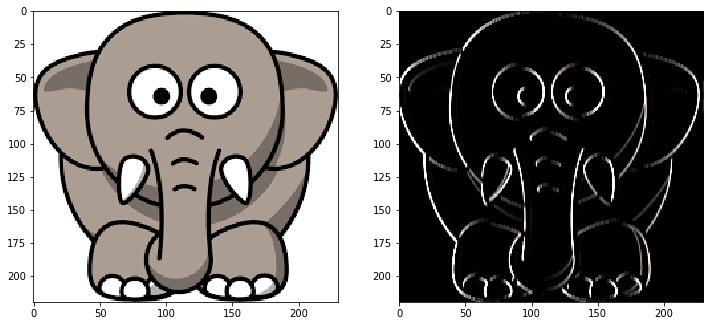

[[ 0.  1. -1.]
 [ 0.  1. -1.]
 [ 0.  1. -1.]]


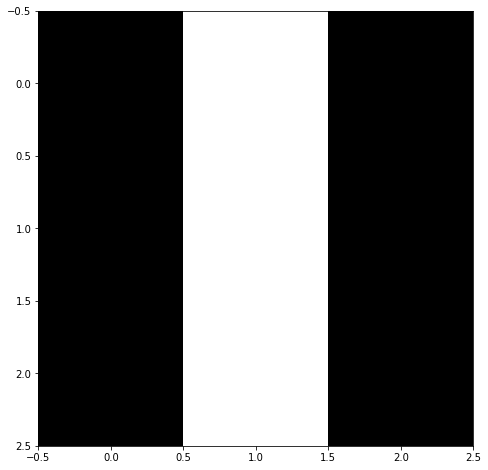

In [146]:
def get_dx_filter2d():
    return np.array([[0, 1, -1]] * 3, dtype=np.float32)

def get_dx_sobel_filter2d():
    return np.array([[1, 0, -1]] * 3, dtype=np.float32)

kernel = get_dx_filter2d()
plot_side_by_side(image, cv2.filter2D(image, -1, kernel))

print(kernel)

kernel[kernel == -1] = 0
plt.imshow(kernel)
plt.show()

### Sobel (Horizontal Edge)

In [ ]:
def get_dy_filter2d():
    return np.array([[0, 1, -1]] * 3, dtype=np.float32).T

def get_dy_sobel_filter2d():
    return np.array([[1, 0, -1]] * 3, dtype=np.float32).T 

kernel = get_dy_filter2d()

plot_side_by_side(image, cv2.filter2D(image, -1, kernel))

print(kernel)

kernel[kernel == -1] = 0
plt.imshow(kernel)
plt.show()

### Laplacian
Second derivatives

In [ ]:
def get_dx2_filter2d():
    # Second derivative  X
    # f(x + 1) + f(x - 1) - 2f(x)

    return np.array([
        [0, 0, 0],
        [1, -2, 1],
        [0, 0, 0]
    ])
    
plot_side_by_side(image, cv2.filter2D(image, -1, get_dx2_filter2d()))

In [ ]:
def get_dy2_filter2d():
    # Second derivative  Y
    # f(y + 1) + f(y - 1) - 2f(y)

    return np.array([
        [0, 1, 0],
        [0, -2, 0],
        [0, 1, 0]
    ])

plot_side_by_side(image, cv2.filter2D(image, -1, get_dy2_filter2d()))

#### Take Laplacian in Once

In [ ]:
def get_laplacian_filter2d():
    return get_dx2_filter2d() + get_dy2_filter2d()

kernel = get_laplacian_filter2d()
plot_side_by_side(image, cv2.filter2D(image, -1, get_laplacian_filter2d()))

plt.imshow(kernel)
plt.show()

print(kernel)

### Edge

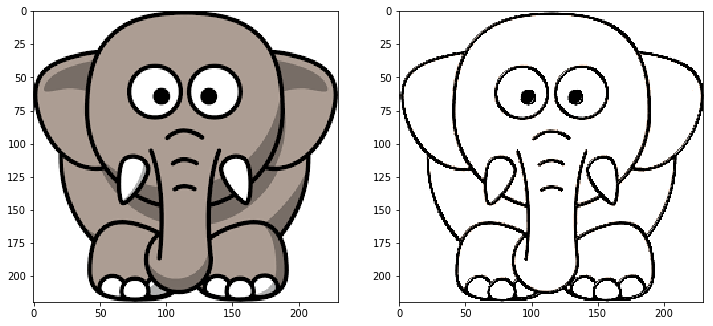

[[ 1.  2. -1.]
 [ 2.  4. -2.]
 [-1. -2.  1.]]


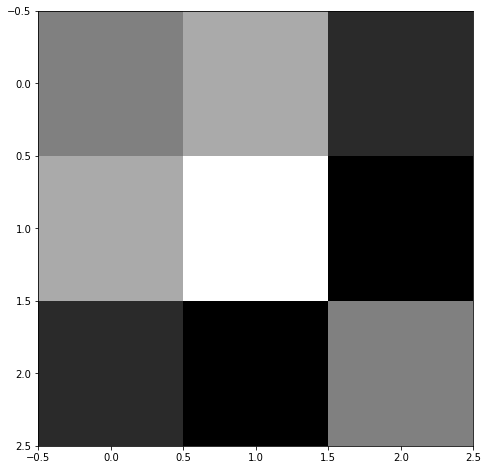

In [144]:
def get_blurred_laplacian():
    kernel = np.array([1, 2, -1], dtype=np.float32)
    return kernel.reshape((len(kernel), 1)) * kernel

kernel = get_blurred_laplacian()
plot_side_by_side(image, cv2.filter2D(image, -1, kernel))

print(kernel)

plt.imshow(kernel)
plt.show()

### Gradient (Orientation)

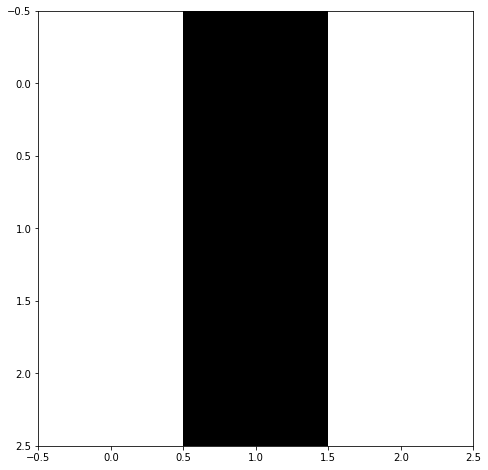

In [234]:
horizontal = np.array([[0, 0, 0], [255, 255, 255], [0, 0, 0]], dtype=np.uint8)
vertical = np.array([[255, 0, 255], [255, 0, 255], [255, 0, 255]], dtype=np.uint8)
corner = np.array([[0, 255, 255], [255, 0, 255], [255, 255, 0]], dtype=np.uint8)

array = vertical
plt.imshow(array)
plt.show()

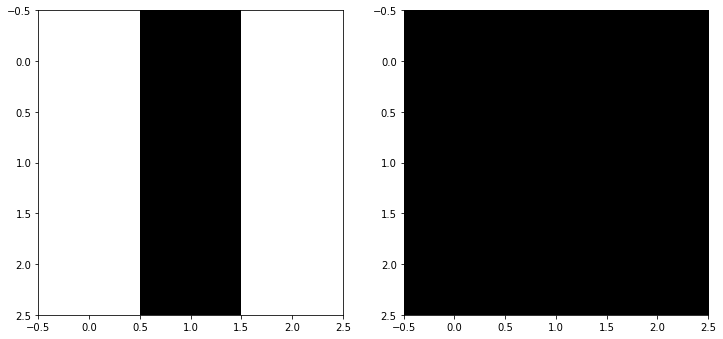

In [235]:
dx = cv2.filter2D(array, -1, get_dx_filter2d())
dy = cv2.filter2D(array, -1, get_dy_filter2d())
plot_side_by_side(dx, dy)

In [236]:
gradient = np.sqrt(np.square(dx) + np.square(dy))
gradient = (gradient/np.max(gradient) * 255).astype('uint8')

print(gradient)

[[255   0 255]
 [255   0 255]
 [255   0 255]]


In [237]:
dy = dy.astype('float32') + 0.0001 # avoid zero
angle = np.ceil(np.degrees(np.arctan(dx / dy)))

print(angle)

[[90.  0. 90.]
 [90.  0. 90.]
 [90.  0. 90.]]


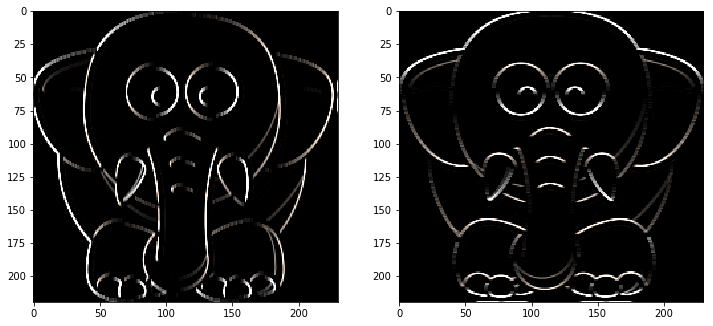

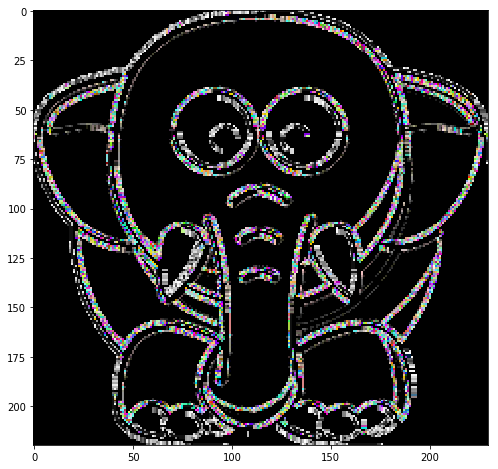

In [200]:
# DX
dx = cv2.filter2D(image, -1, get_dx_filter2d())
dy = cv2.filter2D(image, -1, get_dy_filter2d())

plot_side_by_side(dx, dy)

# Gradient
gradient = np.sqrt(np.square(dx) + np.square(dy))
gradient = (gradient/np.max(gradient) * 255).astype('uint8')

# Angle
dy = dy.astype('float32') + 0.0001 # avoid zero
angle = np.arctan(dx / dy)
angle = ((angle/np.max(angle)) * 255).astype('uint8')

plt.imshow(gradient)
plt.show()

### Additional filters

#### Motion Blur

In [ ]:
def get_motion_blur_filter2d(size=3):
    # generating the kernel
    kernel = np.zeros((size, size))
    # kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
    kernel[int((size-1)/2), int((size-1)/2)] = 1
    kernel[int((size-1)/2), int((size-1)/2) + size // 2] = 1

    return kernel / np.sum(kernel)

# applying the kernel to the input image
kernel = get_motion_blur_filter2d(7)

plot_side_by_side(image, cv2.filter2D(image, -1, kernel))

print(kernel)

### Integral Image

![Example](images/integral_image.png)



In [137]:
size = 4
a = np.linspace(0, size**2, size**2, dtype=np.uint8).reshape(size, size)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 16]]


In [138]:
integral = cv2.integral(a)
print(integral[1:, 1:])

[[  0   1   3   6]
 [  4  10  18  28]
 [ 12  27  45  66]
 [ 24  52  84 121]]


In [ ]:
integral = cv2.integral(image)

plot_side_by_side(image, ((integral/np.max(integral)) * 255).astype('uint8'))

## Features

In [ ]:
# https://www.pyimagesearch.com/2014/03/03/charizard-explains-describe-quantify-image-using-feature-vectors/

### Structural

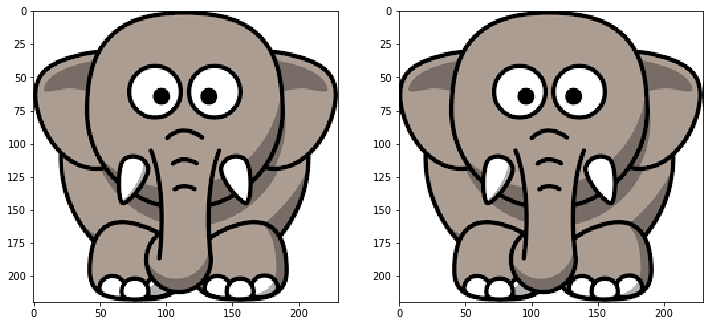

0
3500318


In [244]:
def get_shift_left_filter2d(kernel_size):
    kernel = np.zeros((kernel_size, kernel_size),np.float32)
    kernel[kernel_size // 2, kernel_size - 1] = 1
    return kernel

kernel = get_shift_left_filter2d(3)
shifted = cv2.filter2D(image, -1, kernel)
plot_side_by_side(image, shifted)

print(np.sum(image - image))
print(np.sum(shifted - image))

### Statistical

In [247]:
hist_initial, bins = np.histogram(to_gray(image).ravel(), 256,[0,256])
hist_shifted, bins = np.histogram(to_gray(shifted).ravel(), 256,[0,256])
print(np.sum(hist_initial - hist_shifted))

0


In [ ]:
# https://www.pyimagesearch.com/2014/01/27/hobbits-and-histograms-a-how-to-guide-to-building-your-first-image-search-engine-in-python/

### Template Matching

[Source](https://machinelearningmastery.com/using-opencv-python-and-template-matching-to-play-wheres-waldo/)

In [ ]:
where_waldo = load_image("images/puzzle_small.jpg")

plot_side_by_side_many_vertical([where_waldo, load_image("images/waldo.jpg")])

In [ ]:
# Examples: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html
template = where_waldo[570:610, 98:112, :]
correlation_map = cv2.matchTemplate(where_waldo, waldo, cv2.TM_CCOEFF)
plt.imshow(correlation_map)
plt.show()

# Find Britest spot of image
# https://www.pyimagesearch.com/2014/09/29/finding-brightest-spot-image-using-python-opencv/

# float, float, (int, int), (int, int)
min_value, max_value, min_value_xy, max_value_xy = cv2.minMaxLoc(correlation_map)

w, h = waldo.shape[:2][::-1]
plt.imshow(cv2.circle(where_waldo.copy(), (max_value_xy[0] + w // 2, max_value_xy[1] + h // 2), 20, (255, 0, 0), 5))
plt.show()

### HOG
 https://gurus.pyimagesearch.com/lesson-sample-histogram-of-oriented-gradients-and-car-logo-recognition/

In [ ]:
# Draw HOG features

In [ ]:
### Algorithm
- Resize
- Calculate DX, DY
- Calculate Gradient
- Calculate Angles
- 

![Hog](images/hog_example.png)

In [ ]:
from skimage.feature import hog
from skimage import exposure

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plot_side_by_side(image, hog_image_rescaled)

### HAAR
https://docs.opencv.org/3.4/d7/d8b/tutorial_py_face_detection.html

Video Explanation: https://www.youtube.com/watch?v=x41KFOFGnUE&t=244s

![Haar](images/haar.png)

In [ ]:
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature

images = [np.zeros((2, 2)), np.zeros((2, 2)),
          np.zeros((3, 3)), np.zeros((3, 3)),
          np.zeros((2, 2))]

feature_types = ['type-2-x', 'type-2-y',
                 'type-3-x', 'type-3-y',
                 'type-4']

fig, axs = plt.subplots(3, 2)
for ax, img, feat_t in zip(np.ravel(axs), images, feature_types):
    coord, _ = haar_like_feature_coord(img.shape[0], img.shape[1], feat_t)
    haar_feature = draw_haar_like_feature(img, 0, 0,
                                          img.shape[0],
                                          img.shape[1],
                                          coord,
                                          max_n_features=1,
                                          random_state=0)
    ax.imshow(haar_feature)
    ax.set_title(feat_t)
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('The different Haar-like feature descriptors')
plt.axis('off')
plt.show()

![Haar](images/haar_example.png)

### Hand Mouse Control Demo

[Project](https://imaginghub.com/blog/14-how-to-implement-gesture-control-on-embedded-systems)
[Explanation](https://imaginghub.com/projects/173-implementing-gesture-control-on-raspberry-pi)

## TODO
- Google Collaboratory
- Virtual Envoronments
- Docs